# Section 19: Supervised Learning Capstone Project - Cohort Analysis and Tree Based Methods

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Exercises

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot: xlabel='Churn', ylabel='count'>

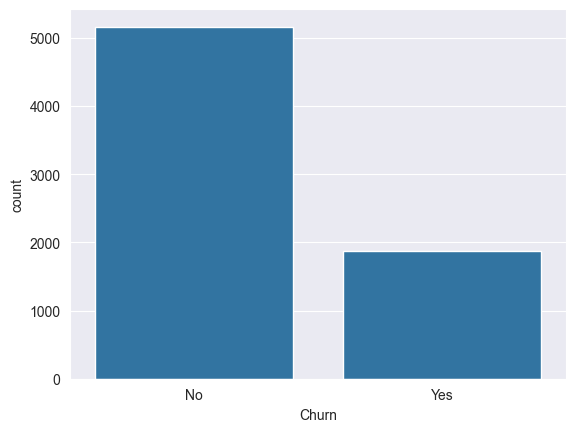

In [7]:
sns.countplot(df, x='Churn')

<AxesSubplot: xlabel='Churn', ylabel='TotalCharges'>

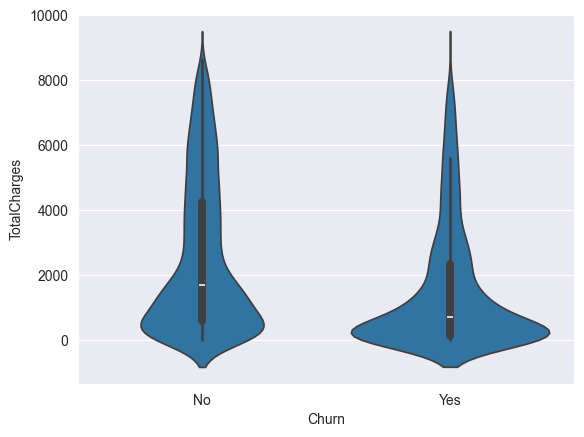

In [8]:
sns.violinplot(df, x='Churn', y='TotalCharges')

<AxesSubplot: xlabel='Contract', ylabel='TotalCharges'>

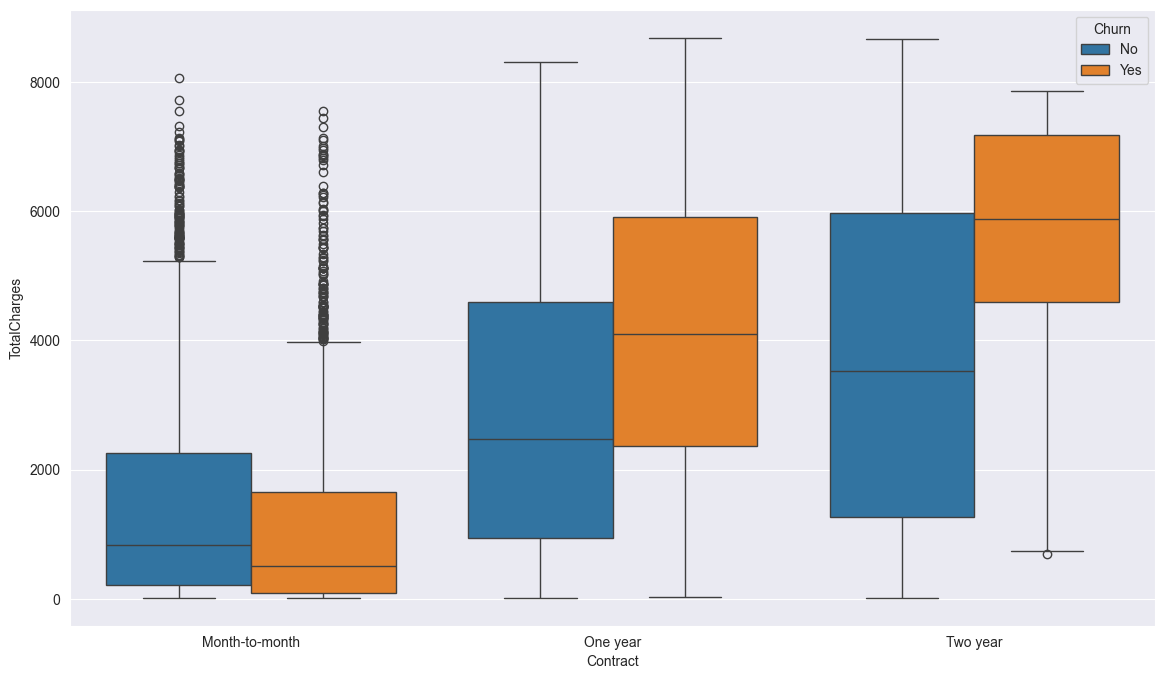

In [9]:
plt.figure(figsize=(14, 8))

sns.boxplot(df, x='Contract', y='TotalCharges', hue='Churn')

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
columns_to_transform = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService', 
                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [12]:
dummies = pd.get_dummies(df[columns_to_transform])

In [13]:
corr = dummies.corr()['Churn_Yes'].sort_values().drop(['Churn_No', 'Churn_Yes'])

In [14]:
corr

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

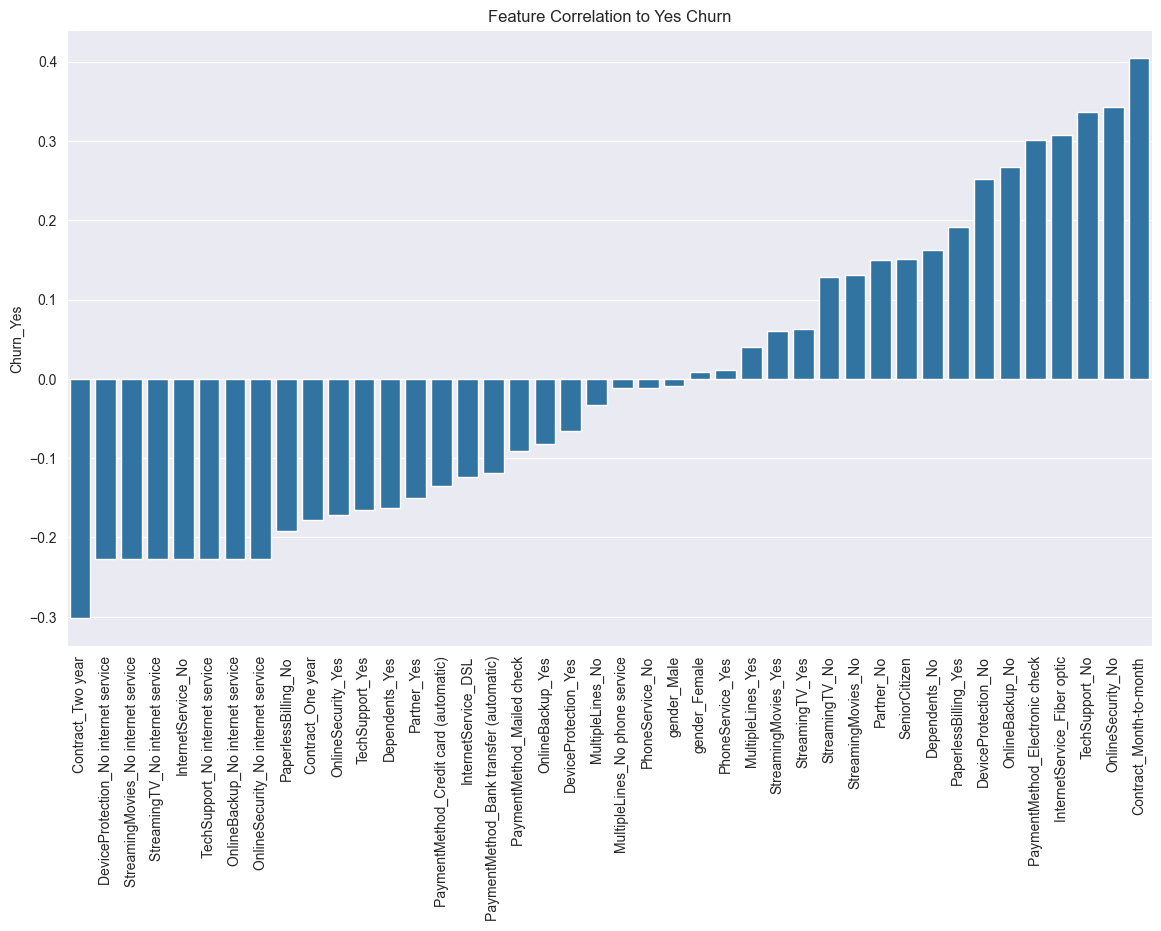

In [15]:
plt.figure(figsize=(14, 8))

sns.barplot(corr)

plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

In [16]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<AxesSubplot: xlabel='tenure', ylabel='Count'>

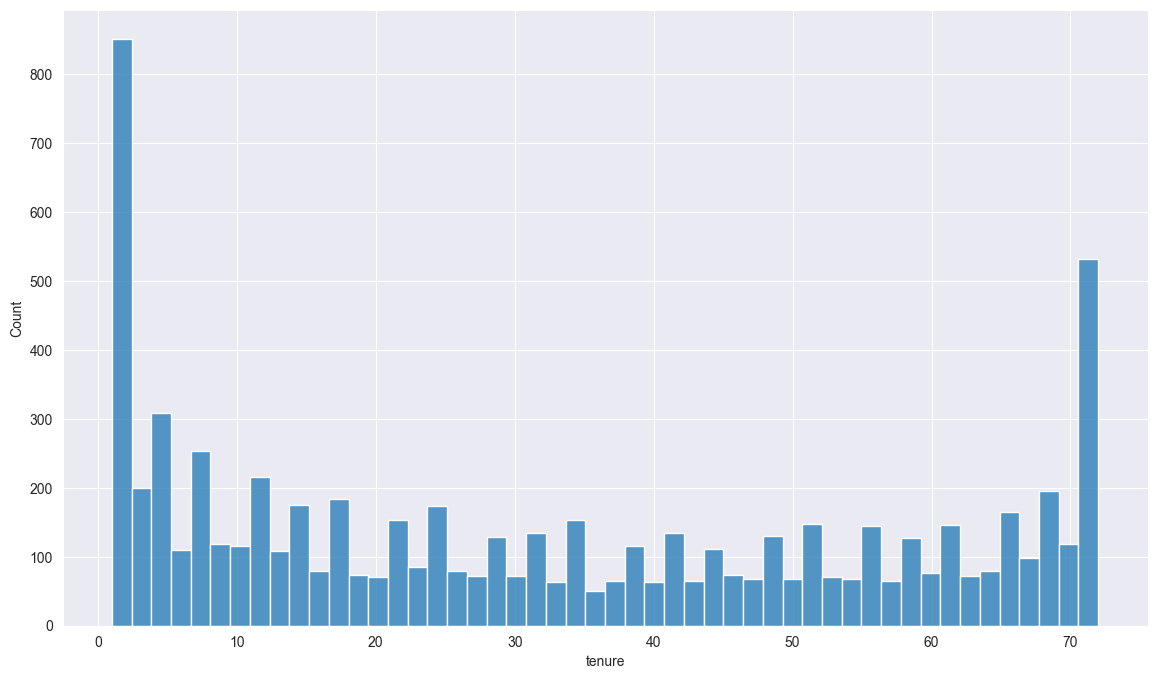

In [17]:
plt.figure(figsize=(14, 8))

sns.histplot(df, x='tenure', bins=50)

<Figure size 1400x800 with 0 Axes>

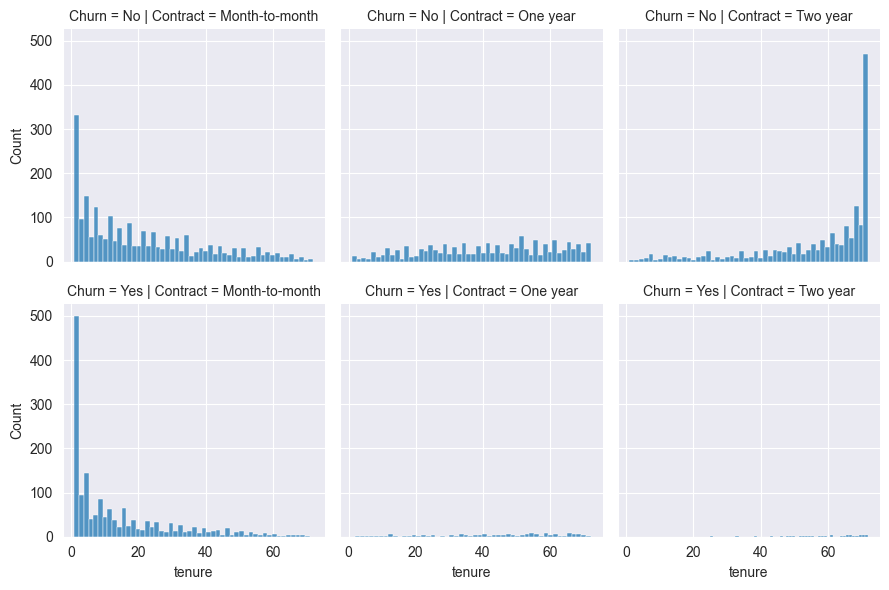

In [18]:
plt.figure(figsize=(14, 8))

g = sns.FacetGrid(df, col='Contract', row='Churn')

g.map_dataframe(sns.histplot, x='tenure', bins=50)

<AxesSubplot: xlabel='MonthlyCharges', ylabel='TotalCharges'>

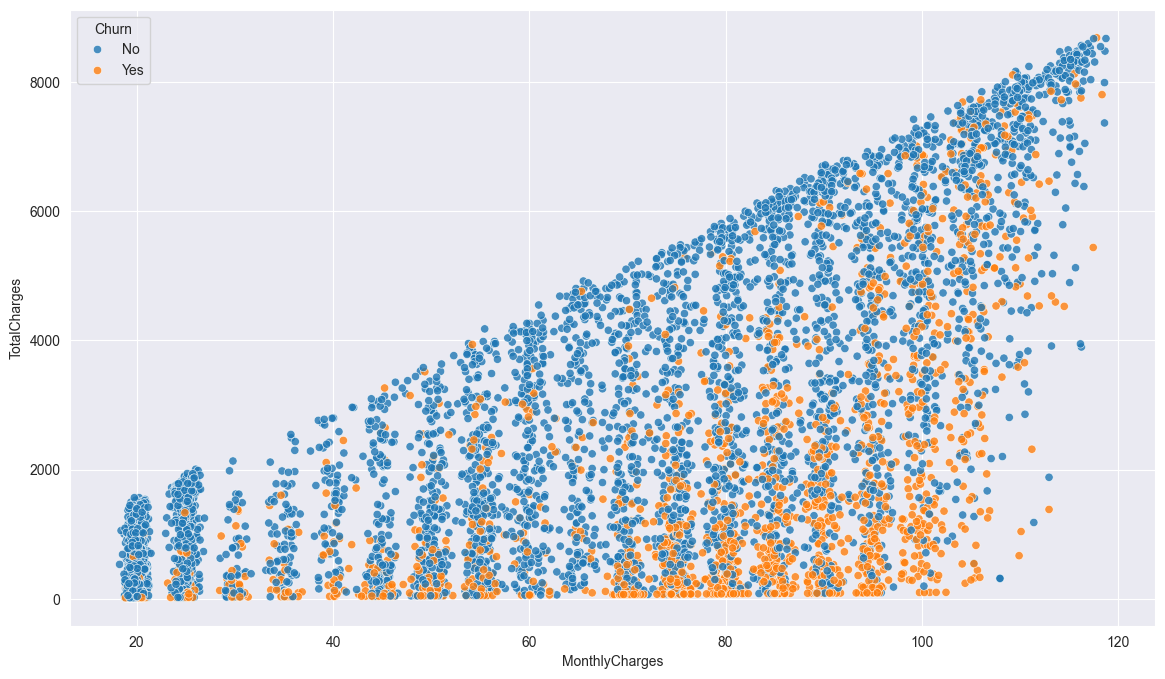

In [19]:
plt.figure(figsize=(14, 8))

sns.scatterplot(df, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.8)

In [20]:
total_churn = df.groupby('tenure').count()['Churn']

In [21]:
yes_churn = df[df['Churn'] == 'Yes'].groupby('tenure').count()['Churn']

In [22]:
yes_percentage_churn = yes_churn * 100 / total_churn

<AxesSubplot: xlabel='tenure', ylabel='Churn'>

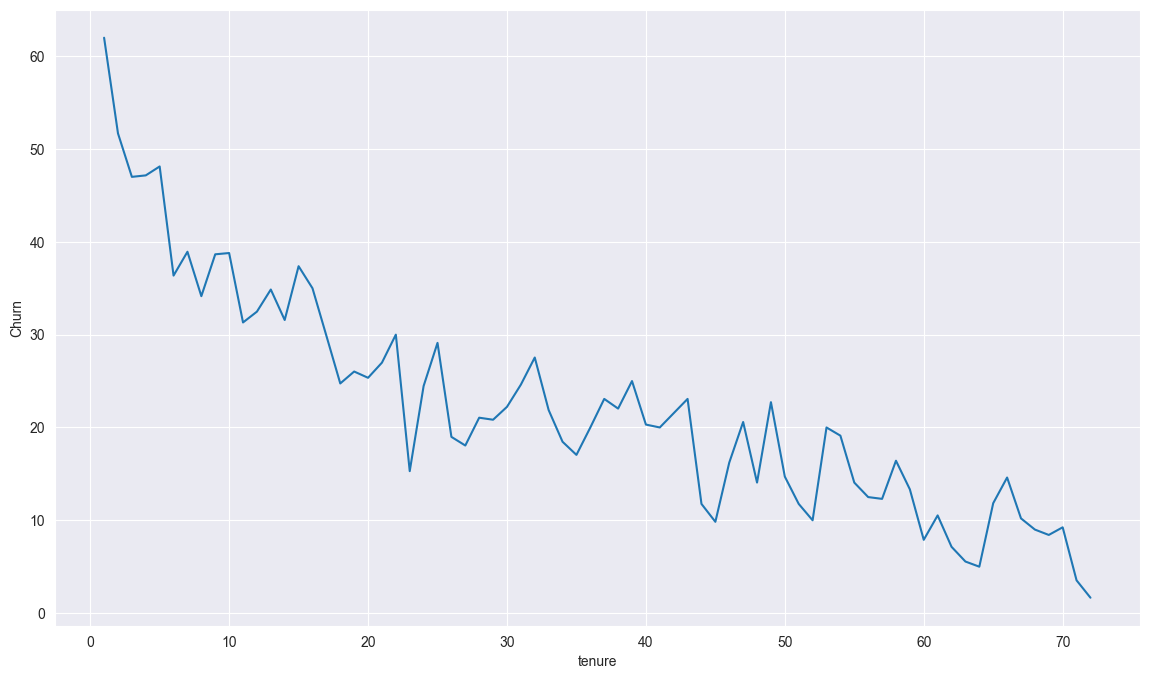

In [23]:
plt.figure(figsize=(14, 8))

sns.lineplot(pd.DataFrame(yes_percentage_churn), x='tenure', y='Churn')

In [24]:
def get_tenure_cohort(tenure):
    if tenure > 48:
        return 'Over 48 Months'
    elif tenure > 24:
        return '24-48 Months'
    elif tenure > 12:
        return '12-24 Months'
    else:
        return '0-12 Months'

df['Tenure Cohort'] = df['tenure'].apply(get_tenure_cohort)

In [25]:
df[['tenure', 'Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7027,24,12-24 Months
7028,72,Over 48 Months
7029,11,0-12 Months
7030,4,0-12 Months


<AxesSubplot: xlabel='MonthlyCharges', ylabel='TotalCharges'>

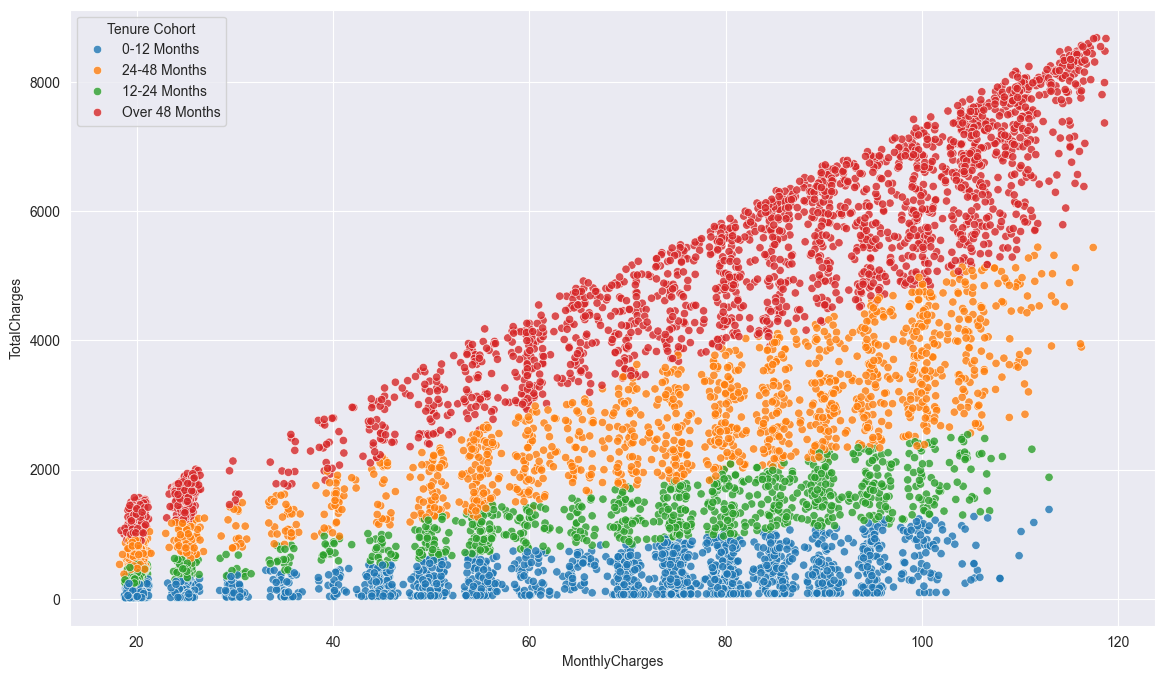

In [26]:
plt.figure(figsize=(14, 8))

sns.scatterplot(df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', alpha=0.8)

<AxesSubplot: xlabel='Tenure Cohort', ylabel='count'>

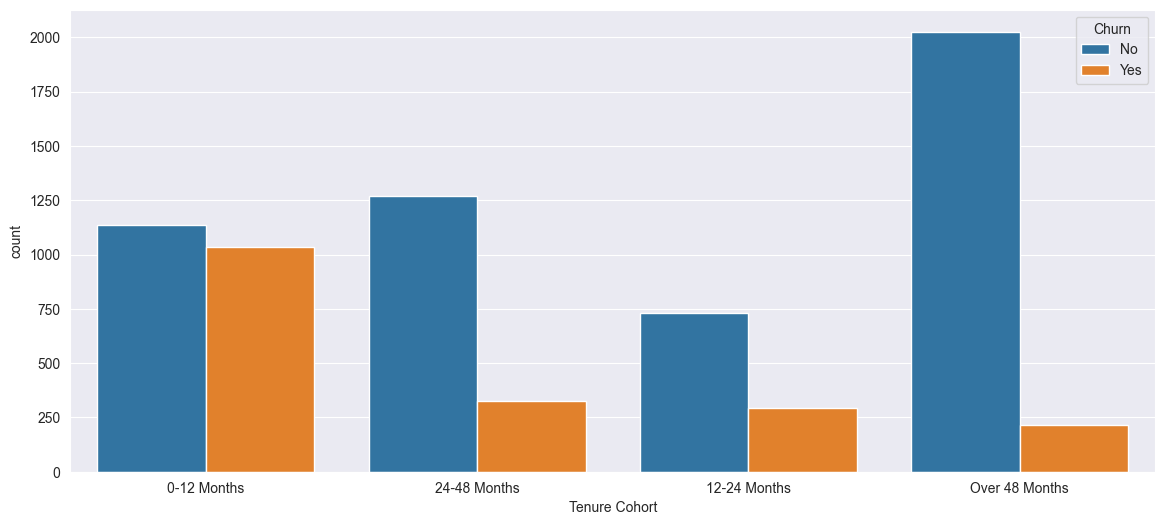

In [27]:
plt.figure(figsize=(14, 6))

sns.countplot(df, x='Tenure Cohort', hue='Churn')

<Figure size 1400x1000 with 0 Axes>

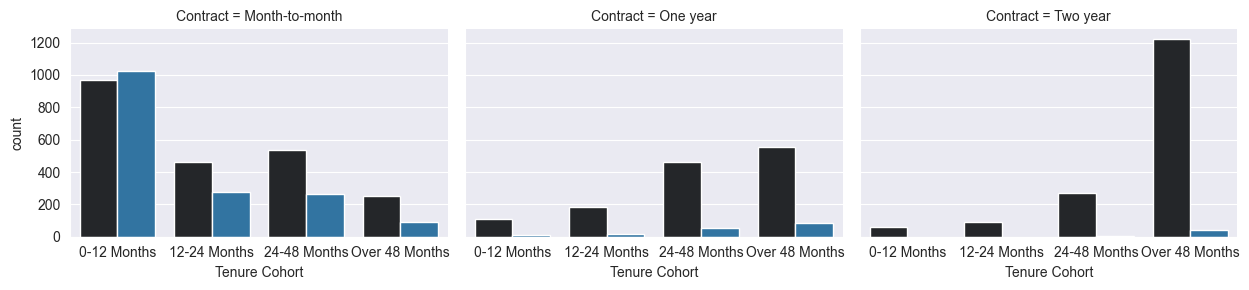

In [28]:
plt.figure(figsize=(14, 10))

g = sns.FacetGrid(df, col='Contract', aspect=1.4)

g.map_dataframe(sns.countplot, x='Tenure Cohort', hue='Churn', palette='dark:#1f77b4')

In [29]:
X = df.drop(['Churn', 'customerID'], axis=1)

In [30]:
X = pd.get_dummies(X, drop_first=True)

In [31]:
y = df['Churn']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [33]:
dt_model = DecisionTreeClassifier(max_depth=6)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



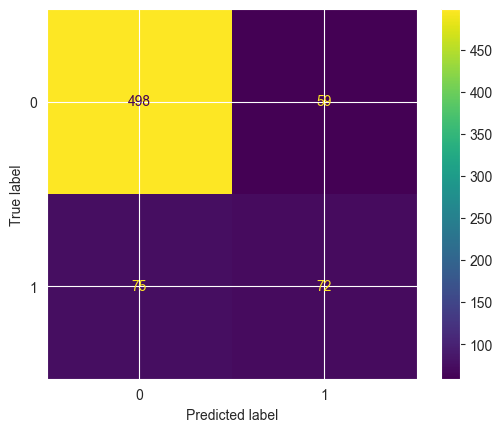

In [34]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)

disp.plot()

In [35]:
feature_importances = dt_model.feature_importances_

feature_importances

array([0.01082504, 0.42391407, 0.04534099, 0.06494213, 0.00123697,
       0.        , 0.        , 0.00696195, 0.00088963, 0.01243191,
       0.31406016, 0.        , 0.        , 0.00837585, 0.        ,
       0.00534132, 0.02628952, 0.        , 0.        , 0.00786752,
       0.        , 0.        , 0.        , 0.        , 0.01002118,
       0.02706543, 0.        , 0.        , 0.03443632, 0.        ,
       0.        , 0.        , 0.        ])

In [36]:
feature_name = X.columns

feature_name

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Tenure Cohort_12-24 Months', 'Tenure Cohort_24-48 Months',
       'Tenure Cohort_Over 48 Months'],
      dtype='object')

In [37]:
feature_importance_decision_tree = pd.DataFrame(
    feature_importances, index=X.columns, columns=['Feature Importance']
).sort_values('Feature Importance')

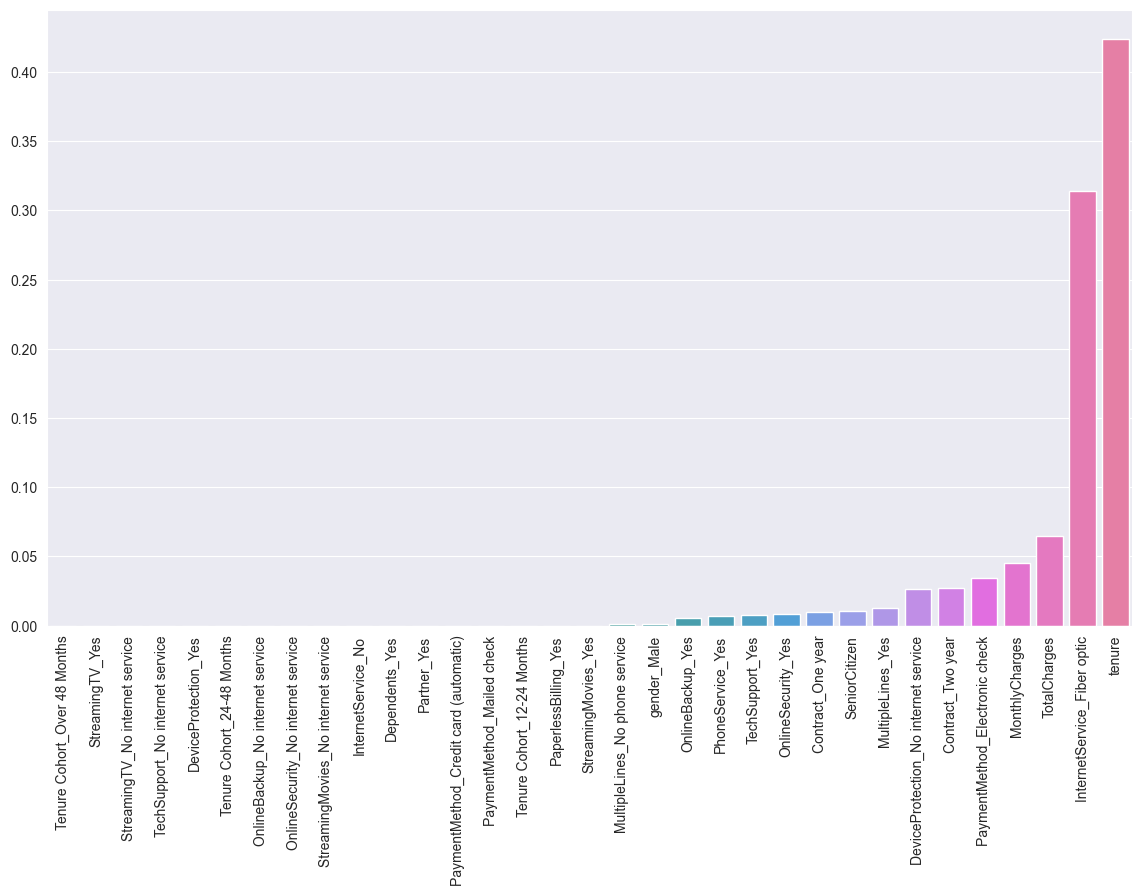

In [38]:
plt.figure(figsize=(14, 8))

sns.barplot(feature_importance_decision_tree.transpose())

plt.xticks(rotation=90);

In [39]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.50      0.44      0.47       147

    accuracy                           0.79       704
   macro avg       0.68      0.66      0.67       704
weighted avg       0.78      0.79      0.79       704



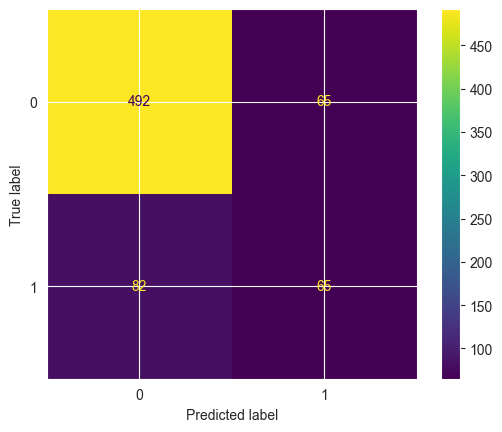

In [40]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)

disp.plot()

In [41]:
ab_model = AdaBoostClassifier()

ab_model.fit(X_train, y_train)

y_pred = ab_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.88      0.91      0.89       557
         Yes       0.60      0.51      0.55       147

    accuracy                           0.83       704
   macro avg       0.74      0.71      0.72       704
weighted avg       0.82      0.83      0.82       704



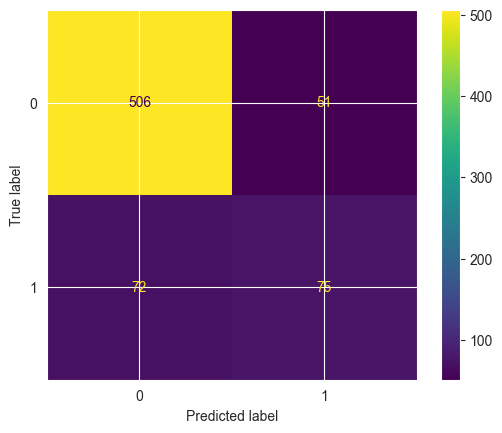

In [42]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)

disp.plot()